- Fundamental of datascientist's toolbook is data visualization
- uses of DV?
  1. To explore data
  2. To communicate data
- easy to visualize but harder to produce good ones

# 1. matplotlib
- most widely used for simple bar charts, line charts, and scatterplots
- not good for elaborate interactive visualization
- -not part of core python library
- install : `python -m pip install matplotlib`

## plot(x,y)

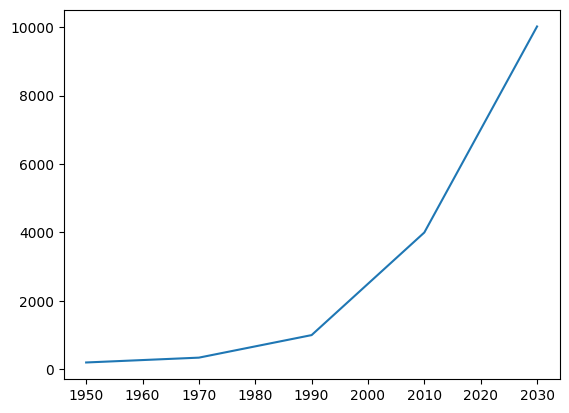

In [48]:
from matplotlib import pyplot as plt

year = [1950, 1970, 1990, 2010, 2030]
gdp = [200, 341.2, 1000.3, 4000.12, 10023]

#plot data
plt.plot(year,gdp)


### Labels and title

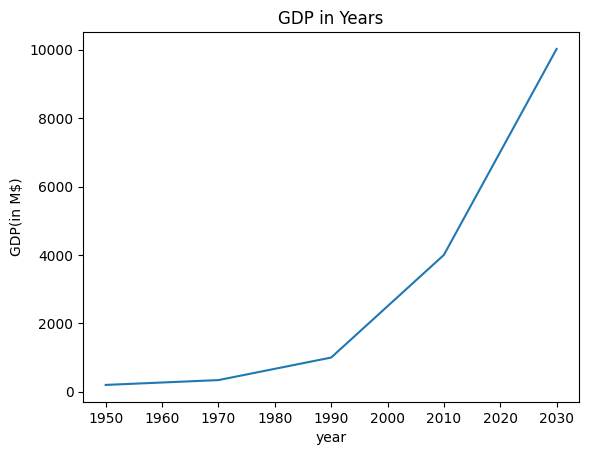

In [19]:
#set lablels
plt.xlabel("year")
plt.ylabel("GDP(in M\$)")
plt.title("GDP in Years")
plt.plot(x,y)

## subplot(nrow, ncol, grid_index)
- to get multiple plots in same figure
- syntax: `plt.subplot(nrow, ncol, index)

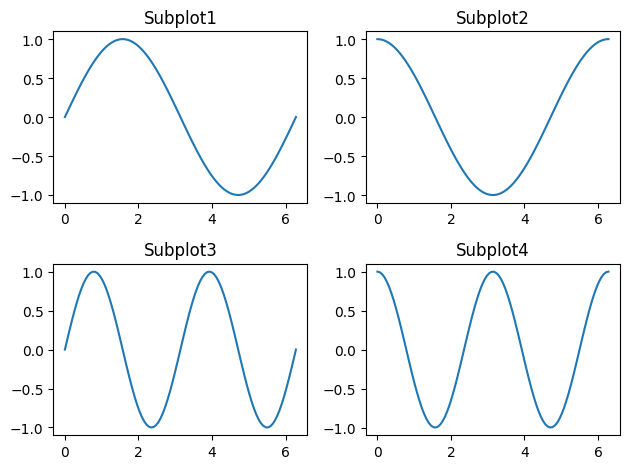

In [42]:
#Example subplot of 2x2 grid
import matplotlib.pyplot as plt
import numpy as np                #numpy is numerical computing library for python

x= np.linspace(0, 2* np.pi, 100)  #generate 100 linearly/evenly spaced numbers between 0-2pi
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2* x)
y4 = np.cos(2* x)

plt.subplot(2,2,1)                #first grid in figure
plt.plot(x,y1)
plt.title('Subplot1')

plt.subplot(2,2,2)                 #second grid in figure
plt.plot(x,y2)
plt.title('Subplot2')

plt.subplot(2,2,3)                # third grid in figure
plt.plot(x,y3)
plt.title('Subplot3')

plt.subplot(2,2,4)                #fourth grid in figure
plt.plot(x,y4)
plt.title('Subplot4')

plt.tight_layout()   #to automatically adjust the subplot parameters for better spacing.


plt.show()           #displaying the subplots

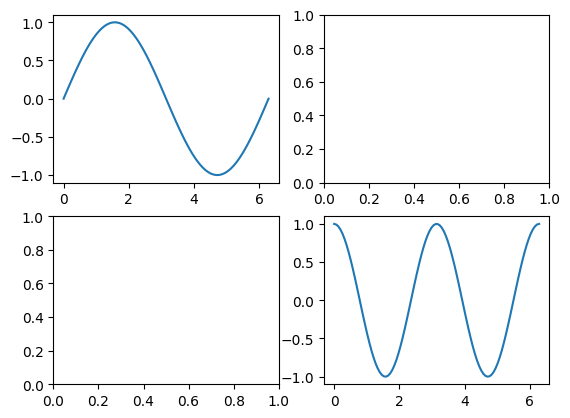

In [46]:
#To deal with multiple subplots
#Can also use following method

fig, axes= plt.subplots(nrows=2, ncols=2)   #in 'fig' there are 4 subplot 'axes'
axes[0, 0].plot(x, y1)
axes[1, 1].plot(x, y4)
plt.show()

## other common attributes of plt.plot()

Text(0, 0.5, 'GDP in million $')

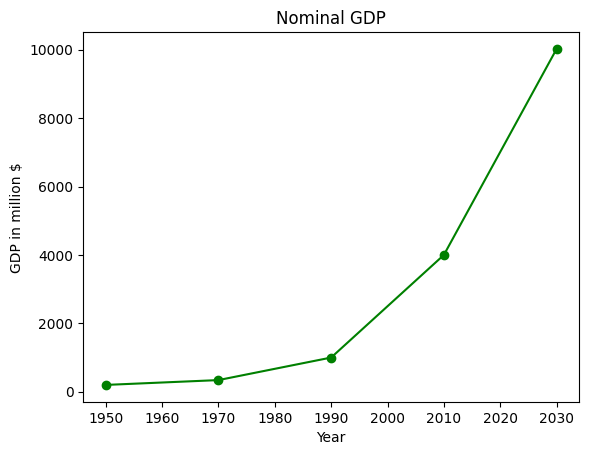

In [50]:
plt.plot(year, gdp, color= 'green', marker= 'o', linestyle= 'solid')
plt.title('Nominal GDP')
plt.xlabel('Year')
plt.ylabel('GDP in million $')

# 2. Bar charts
- to compare groups or track changes over time.
- syntax `plt.bar(x,y)

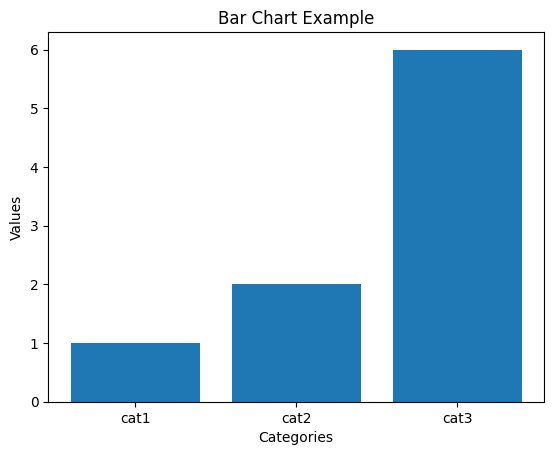

In [170]:
import matplotlib.pyplot as plt

category = ['cat1', 'cat2', 'cat3']
values = [1,2,6]

plt.bar(category, values)
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


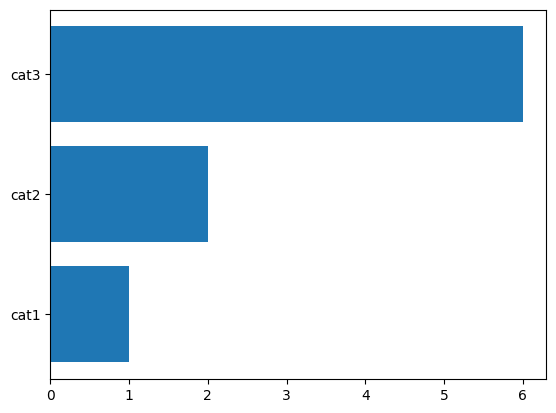

In [169]:
#plot horizonally
plt.barh(category, values)
plt.show()

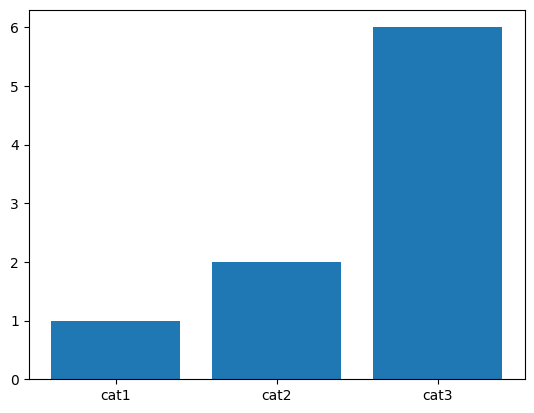

In [168]:
#plot x ticks on centre of bars

plt.xticks(range(len(category)), category)
plt.bar(category, values)
plt.show()

## use bar chart for histogram plot 
- bar charts can be used to plot histogram of binned(bucketed) values


[80, 90, 90, 80, 70, 0, 80, 80, 100, 60, 70, 70, 0]
dict_items([(80, 4), (90, 2), (70, 3), (0, 2), (100, 1), (60, 1)])


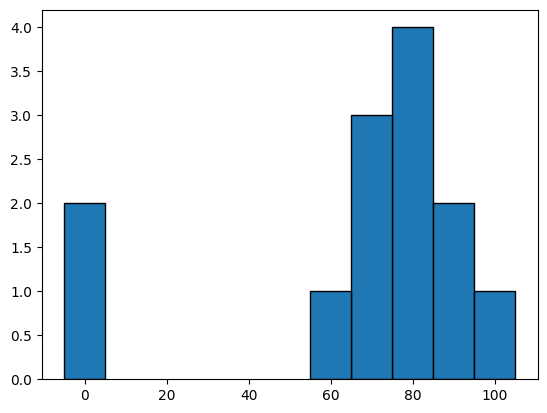

In [167]:
import matplotlib.pyplot as plt
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0] #grades of students in a class

#we want a histogram of number of students in each decile (i.e. 0-10, 10-20, 20-30 etc)

#first round the grades to nearby decile
rounded_grades = []
for i in grades:
    rounded_value = i//10*10
    rounded_grades.append(rounded_value)

print(rounded_grades)    #[80, 80, 90, 70, 0, 10, 10, 60, 30, 10, 10, 0, 0]

#count grades frequency
histogram = Counter(rounded_grades)   #a dict output
print(histogram.items())
#plot bar chart

plt.bar(histogram.keys(),                    #keys of dict 'histogram'
        histogram.values(),                  #values of dict 
        width= 10,                           #width of each bar
        edgecolor= (0,0,0))                  #black edges of each bar

plt.show()

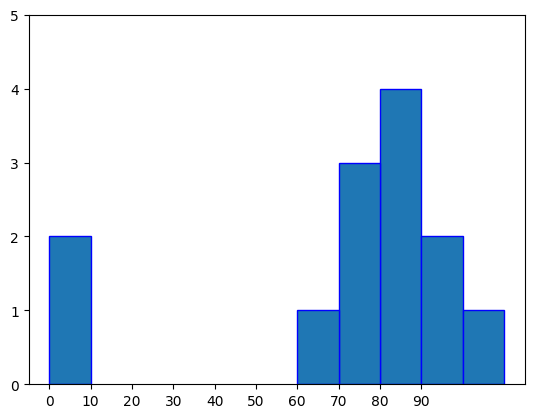

In [166]:
# This code can be written in one line
#We also shifted the bars right by 5, so that, for example, the “10” bar (which corresponds to the decile 10–20) 
#would have its center at 15 and hence occupy the correct range.
#We also added a blue edge to each bar to make them visually distinct.

import matplotlib.pyplot as plt
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
histogram = Counter(i//10*10 for i in grades)
plt.bar([x+5 for x in histogram.keys()],histogram.values(), width=10, edgecolor=(0,0,1))
plt.xticks([10*i for i in range(0, 10)])
plt.axis([-5,115,0,5])
plt.show()

- Be judicious when using `plt.axis()`.

## misleading plots
- When creating bar charts it is considered especially bad form for your y-axis not to start at 0, since this is an easy way to mislead people.

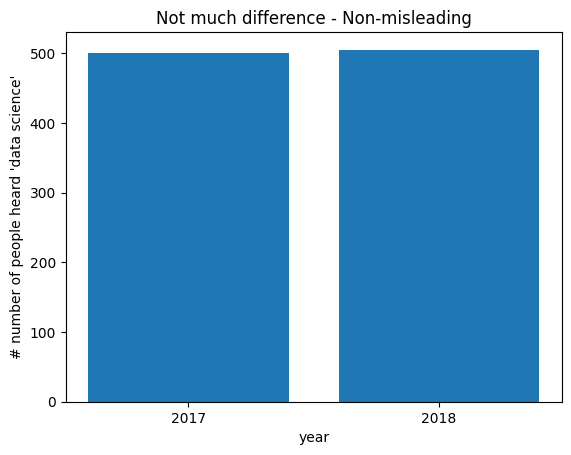

In [165]:
#Example
#plot number of people heart name "data science" in years 2017 and 2018

from matplotlib import pyplot as plt

number= [500, 505]
year= [2017, 2018]
plt.bar(year, number)
plt.xlabel("year")
plt.ylabel("# number of people heard 'data science'")
plt.title("Not much difference - Non-misleading")
plt.xticks(year)                   #keeps only central values
plt.show()

#there is negligible diff between the years


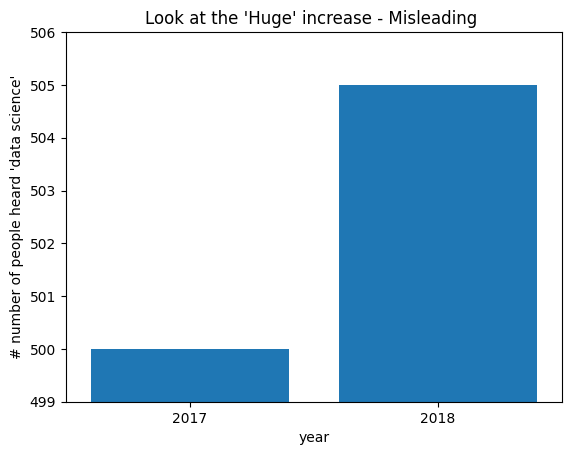

In [164]:
#twist the axes 

from matplotlib import pyplot as plt

number= [500, 505]
year= [2017, 2018]
plt.bar(year, number)
plt.xlabel("year")
plt.ylabel("# number of people heard 'data science'")
plt.axis([2016.5, 2018.5, 499, 506])                                  
plt.xticks(year)
plt.title("Look at the 'Huge' increase - Misleading ")
plt.show()

# 3. Line charts
- using plt.plot()

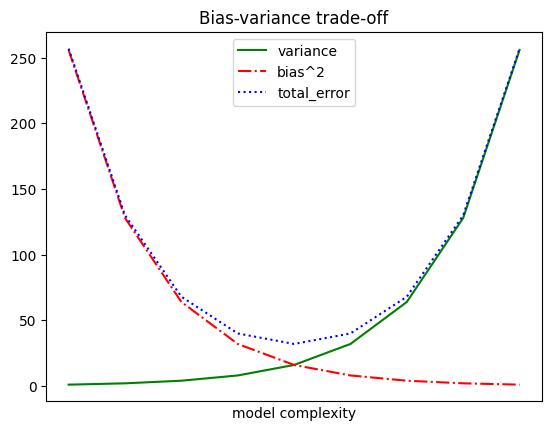

In [146]:
from matplotlib import pyplot as plt

variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x+y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]     #i.e. i is index of variance set

#plot multiple variables
plt.plot(xs, variance, 'g-', label= 'variance')   #green with solid line with label 'variance'
plt.plot(xs, bias_squared, 'r-.', label= 'bias^2')  #red with dash and dot line
plt.plot(xs, total_error, 'b:', label= 'total_error')   #blue with dotted line

#set legend
plt.legend(loc=9)    #to set legend at top centre
plt.xlabel("model complexity")
plt.xticks([])
plt.title( "Bias-variance trade-off")
plt.show()

# 4. Scatter Plots
- to visualize paired set of data

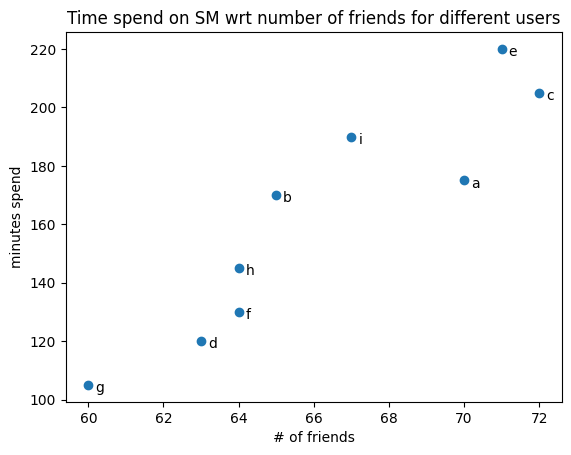

In [163]:
#plot time users spend on SM wrt their number of friends in SM

from matplotlib import pyplot as plt

users = ['a','b','c','d','e','f','g','h','i']
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]

plt.scatter(friends, minutes)

#label the users

for labels, friend_count, minute_count in zip(users, friends, minutes):
    plt.annotate(labels, 
                 xy=(friend_count, minute_count), 
                 xytext=(5, -5), textcoords='offset points')

#xytext(5, -5): text label of xy will be placed at offset 5 right and 5 down
#textcoords = 'offset points' means the coordinate system of xytext will be placed relative to xypoint.

#put labels
plt.xlabel("# of friends")
plt.ylabel("minutes spend")
plt.title ("Time spend on SM wrt number of friends for different users")
plt.show()

## Scattering comparable variables

- plot with equal axes, otherwise result will be a mileading picture

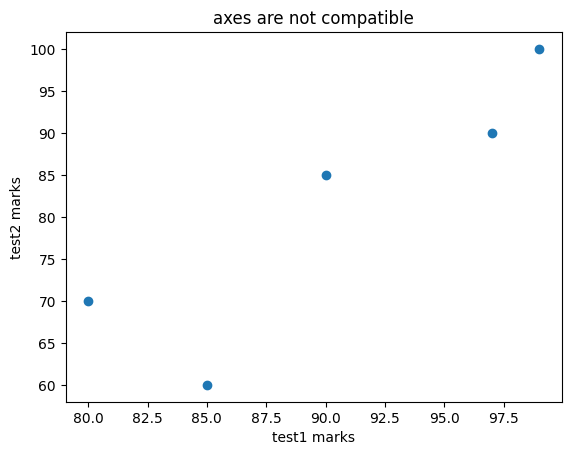

In [181]:
import matplotlib.pyplot as plt

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades,test_2_grades)
plt.xlabel("test1 marks")
plt.ylabel("test2 marks")
plt.title("axes are not compatible")
plt.show()

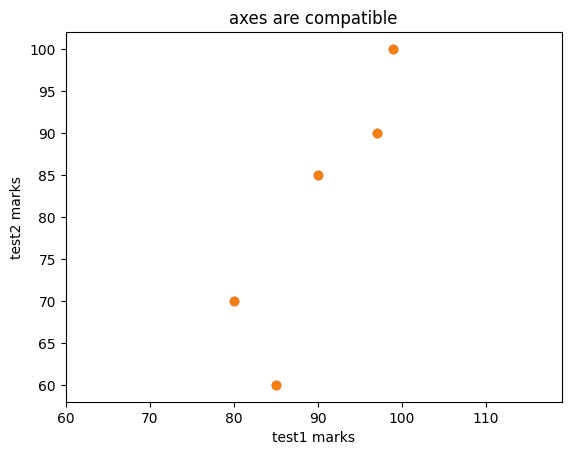

In [182]:
#because it is zoomed in x axis, we cant see the real picture
#thus make the axes equal
import matplotlib.pyplot as plt

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades,test_2_grades)
plt.scatter(test_1_grades,test_2_grades)
plt.xlabel("test1 marks")
plt.ylabel("test2 marks")
plt.title("axes are compatible")

plt.axis("equal")
plt.show()

# Further Details
- visit https://matplotlib.org/stable/

- To get more prettier plots use, https://seaborn.pydata.org/ : seaborn library, which is based on matplotlib

- for declarative visualization use Altair : https://altair-viz.github.io/
  - Declarative visualization refers to the approach in which the user specifies what they want to visualize and the system automatically generates the visualization based on that specification. In other words, the emphasis is on describing the desired outcome rather than explicitly programming how to create the visualization.

- https://d3js.org/ is a JavaScript library for producing sophisticated interactive visualizations for the web. Although it is not in Python, it is widely used, and it is well worth your while to be familiar with it.
- https://docs.bokeh.org/en/latest/ is a library that brings D3-style visualizations into Python.